# Libs

In [1]:
%matplotlib inline

import os

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import skimage
import os
import seaborn as sns

import cv2

import sys
sys.path.append('../scripts/')

from Annotation_functions import draw_annotations, get_boxes, get_filtered_bboxes

# Checking the idea of segmentation by Hue

loading image

In [2]:
bacteria = cv2.imread('../pictures/test_input_5.bmp')

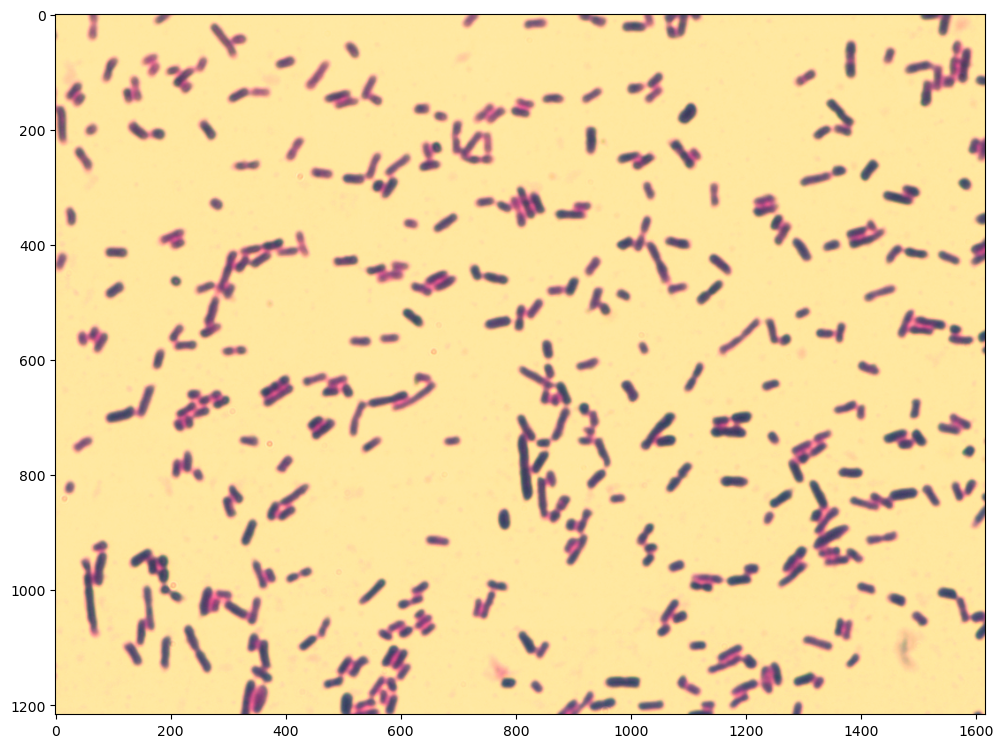

In [3]:
plt.figure(figsize = (12,10))
plt.imshow(bacteria[:,:,::-1])
plt.show()

filtering image (by downscaling and upscaling)

In [4]:
bacteria_filtered = cv2.resize(np.round(np.uint8(skimage.measure.block_reduce(bacteria, (2,2,1), np.mean, func_kwargs={'dtype': np.float16}))),
                                bacteria.shape[:-1][::-1], interpolation = cv2.INTER_CUBIC)

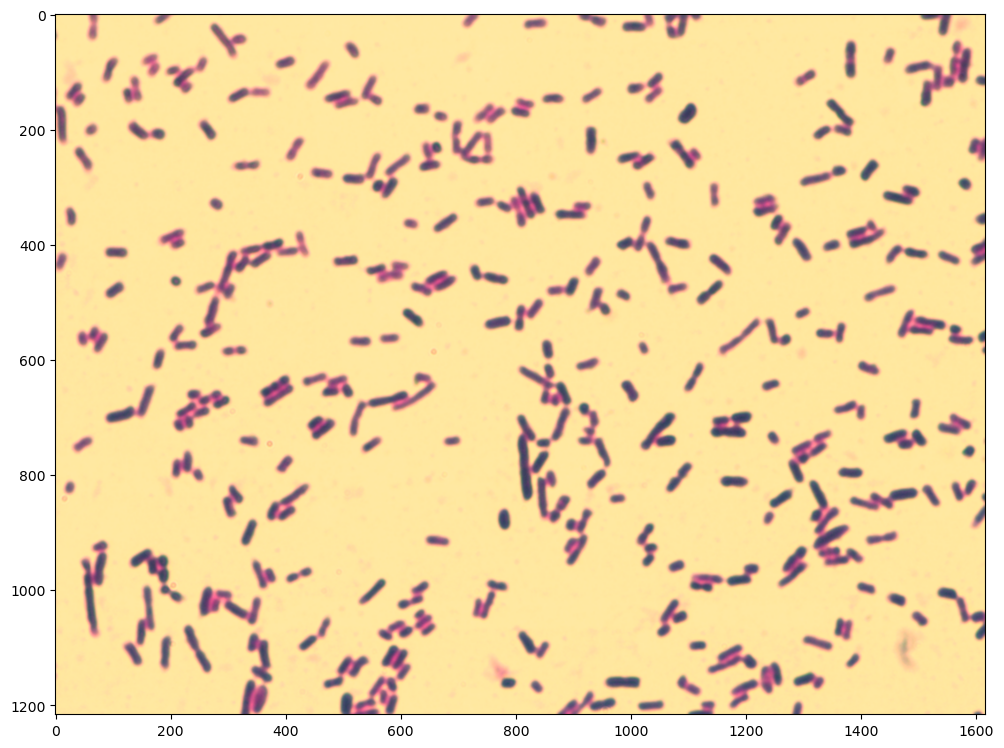

In [5]:
plt.figure(figsize = (12,10))
plt.imshow(bacteria_filtered[:,:,::-1])
plt.show()

Hue inspection

In [6]:
bacteria_filtered_hsv = cv2.cvtColor(bacteria_filtered, cv2.COLOR_BGR2HSV)

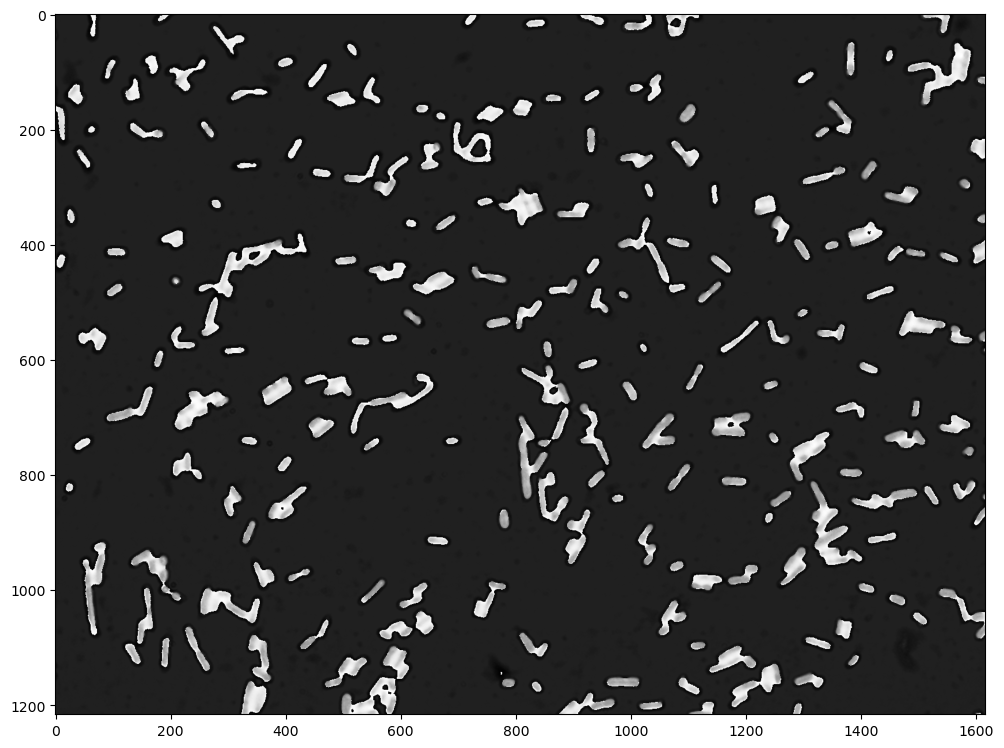

In [7]:
plt.figure(figsize = (12,10))
plt.imshow(bacteria_filtered_hsv[:,:,0], cmap = 'gray')
plt.show()

In [8]:
bacteria_filtered_hsv_histogram = np.histogram(bacteria_filtered_hsv[:,:,0].flatten(), bins=[el for el in range(180)])

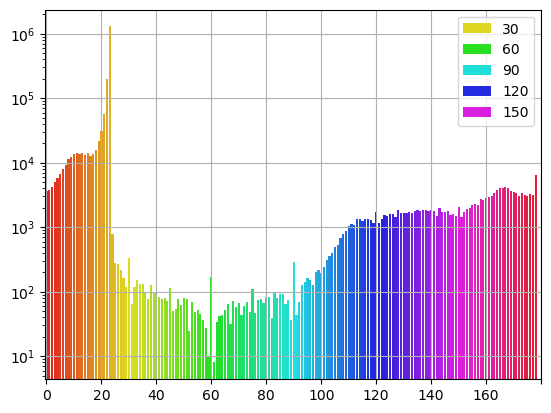

In [9]:
sns.barplot(x = bacteria_filtered_hsv_histogram[1][0:-1], y = bacteria_filtered_hsv_histogram[0], hue = bacteria_filtered_hsv_histogram[1][1:], palette='hsv')
plt.yscale('log')
plt.xticks(np.arange(0,181,20))
plt.grid()
plt.show()

Thresholding by hue

In [10]:
threshold_value, bacteria_filtered_hsv_thresholded = cv2.threshold(bacteria_filtered_hsv[:,:,0],60,180,cv2.THRESH_TOZERO)

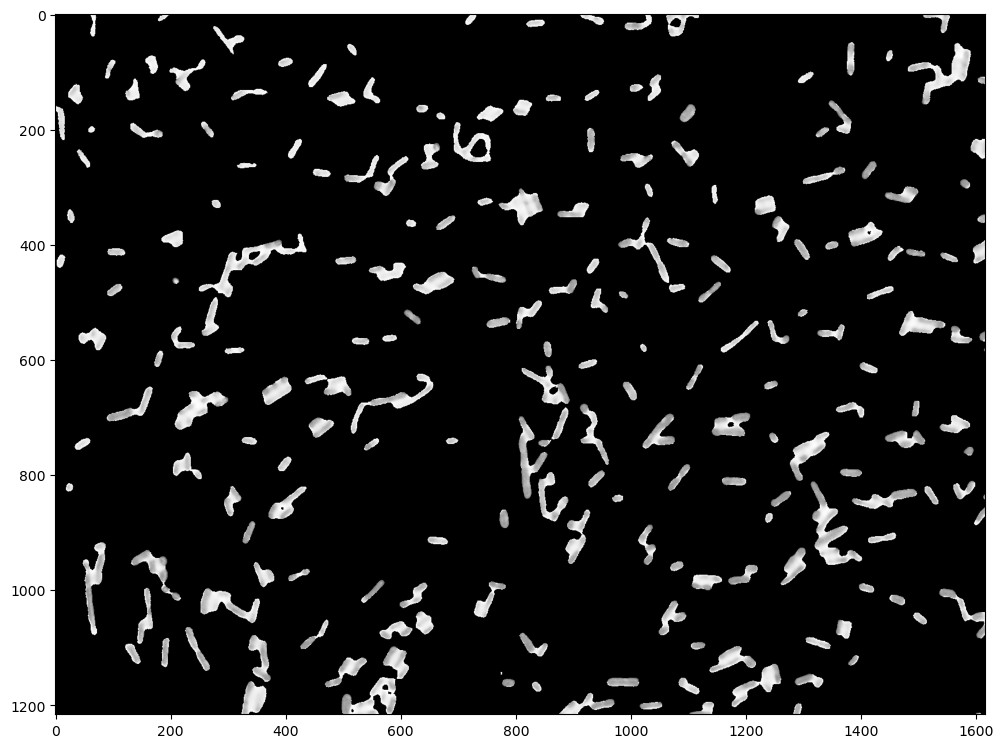

In [11]:
plt.figure(figsize = (12,10))
plt.imshow(bacteria_filtered_hsv_thresholded, cmap='gray')
plt.show()

Drawing contours on image

In [12]:
bacteria_filtered_contours = sorted(cv2.findContours(cv2.threshold(bacteria_filtered_hsv[:,:,0],80,180,cv2.THRESH_BINARY)[1], cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0], key = cv2.contourArea, reverse= True)
bacteria_filtered_contours_drawn = cv2.drawContours(bacteria_filtered,
                                                     bacteria_filtered_contours,
                                                     contourIdx=-1, color=(0, 255, 0), thickness=2)

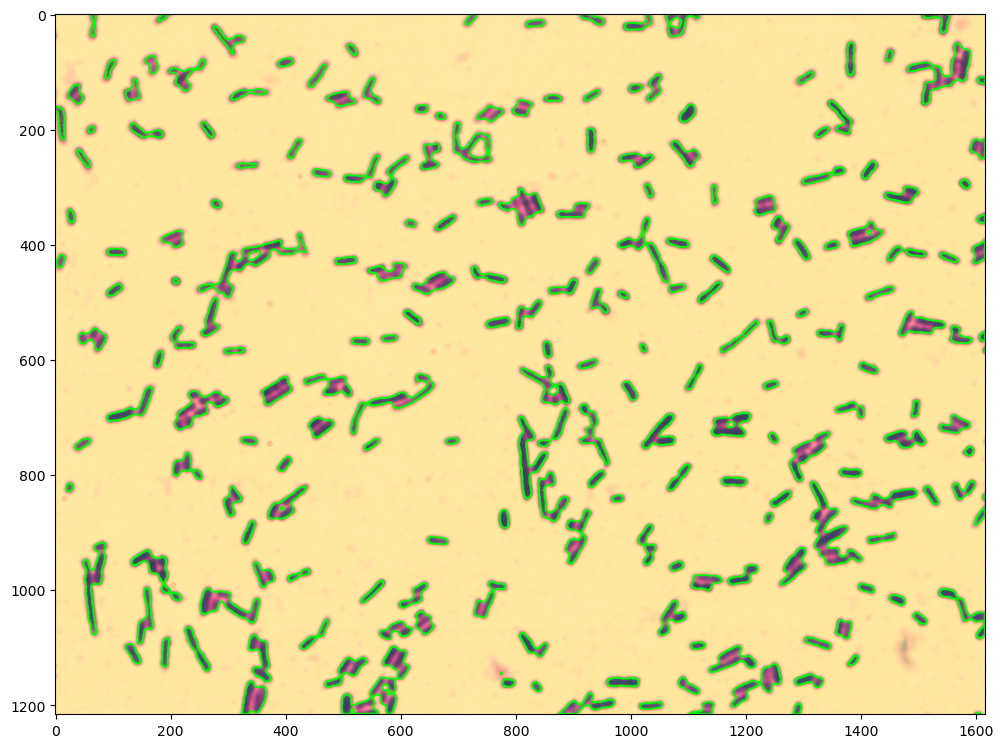

In [13]:
plt.figure(figsize = (12,10))
plt.imshow(bacteria_filtered_contours_drawn[:,:,::-1])
plt.show()

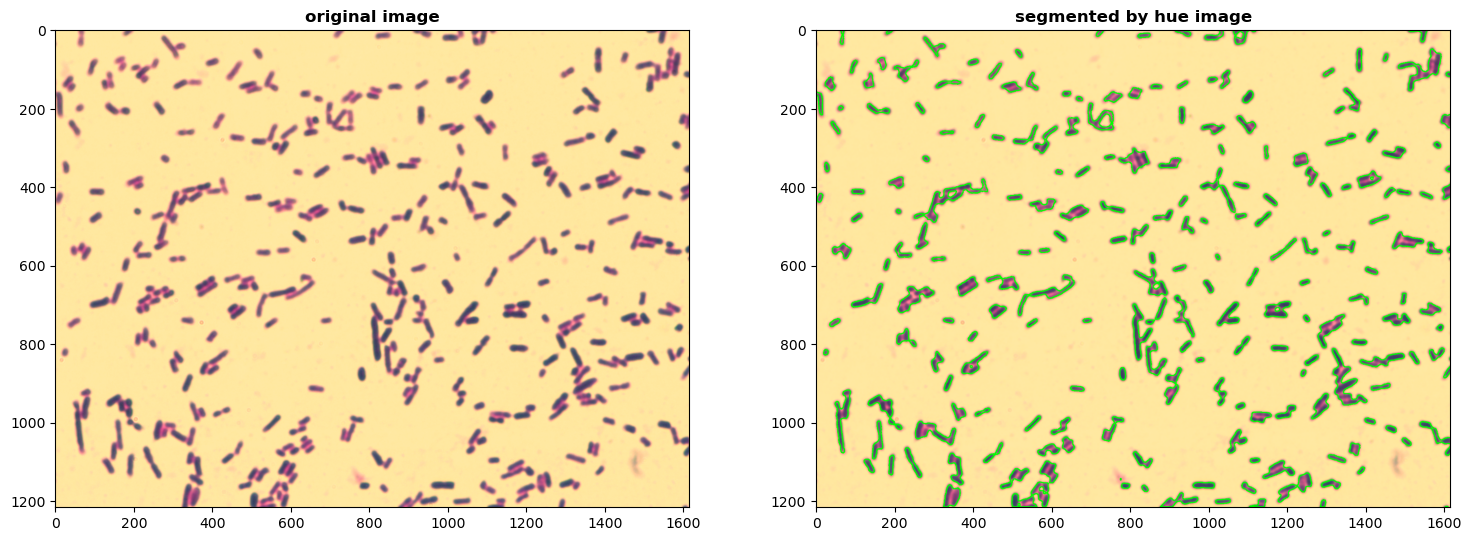

In [14]:
fig, axs = plt.subplots(1,2,figsize=(18,12))
axs[0].imshow(bacteria[:,:,::-1])
axs[0].set_title('original image', weight='bold')

axs[1].imshow(bacteria_filtered_contours_drawn[:,:,::-1])
axs[1].set_title('segmented by hue image', weight='bold')

plt.show()